### Team 24- Question 3


### Import statements 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
# import os
# os.getcwd()
# os.chdir('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets')

### Class and function definitions

In [ ]:
class Perceptron:
    
    def __init__(self, eta):
        self.eta = eta
        
    def f(self, s, beta = 100):
        return 1/(1+np.exp(-beta*s))
            
    def line(self, w, X):
        x = np.linspace(np.min(X[:, 1])-1 , np.max(X[:, 1])+1, 50)
        c = -w[0]/w[-1]
        m = -w[1]/w[-1]
        y = m*x + c
        return x,y 

    def predict(self, w, X):   
        Y_hat = np.zeros(X.shape[0])
        class_1 = np.argwhere(np.dot(X, w) >= 0)
        class_0 = np.argwhere(np.dot(X, w) < 0)
        Y_hat[class_1] = 1
        Y_hat[class_0] = -1
        return Y_hat   
        
    def accuracy(self, Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere(Y_true==Y_pred))
        N  = Y_true.shape[0]
        return tp/N
   

    def train(self, X, Y, max_iter = 1000):

        epoch = 0
        error_old = np.inf
        w_old = np.ones(X.shape[1])
        self.w = w_old
        
        while epoch < max_iter:
            epoch += 1
            
            for t in range(X.shape[0]):
                xt = X[t, :]
                yt = Y[t]
                if yt*(np.dot(w_old, xt)) <= 0:
                    w_new = w_old + self.eta*yt*xt 
                else:
                    w_new = w_old
                w_old = w_new
                self.w = w_new
                Y_hat = self.predict(self.w, X)
                error_new = 1 - self.accuracy(Y, Y_hat)

                if error_new == 0.0 or (abs(error_old-error_new)/(error_new) < 0.0001 and error_new < 0.01):
                    print('Converged!!')
                    print('Epoch: {0}, T:{0}, Error: {1}'.format(epoch, t, error_new))
                    return (epoch-1)*X.shape[0] + t + 1
                error_old = error_new
                
        if epoch == max_iter:
            print('Did not converge!')

In [ ]:
def accuracy(Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere((Y_true)==(Y_pred)))
        N  = Y_true.shape[0]
        return tp/N

## Dataset 1


In [ ]:
data = pd.read_csv('Dataset_1_Team_24.csv')
data.head()

,# x_1,x_2,Class_label
0,251.290678,-307.404235,1
1,313.403318,-270.377457,1
2,-302.947861,395.402585,0
3,270.918576,-318.853878,1
4,-286.806780,392.455625,0


In [ ]:
data.columns = ['X1','X2', 'Y']

In [ ]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

### Visualising the data

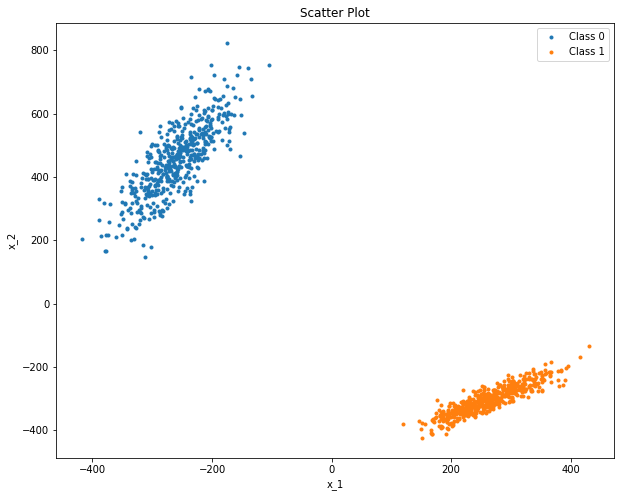

In [ ]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')


plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel

In [ ]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [ ]:
eta = 0.01         
nn = Perceptron(eta)
n_updates = nn.train(X_train_a, Y_train)

Converged!!
Epoch: 1, T:1, Error: 0


In [ ]:
n_updates

1

In [ ]:
r = np.max(np.linalg.norm(X_train_a, axis=1))
rho = np.min(np.abs(np.dot(X_train_a, nn.w)))/np.linalg.norm(nn.w)
print('Theoretical bound on the number of updates made by the Perceptron algorithm = ', (r/rho)**2)

Theoretical bound on the number of updates made by the Perceptron algorithm =  7.739006402190852


In [ ]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [ ]:
accuracy_linear_train1 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test1 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


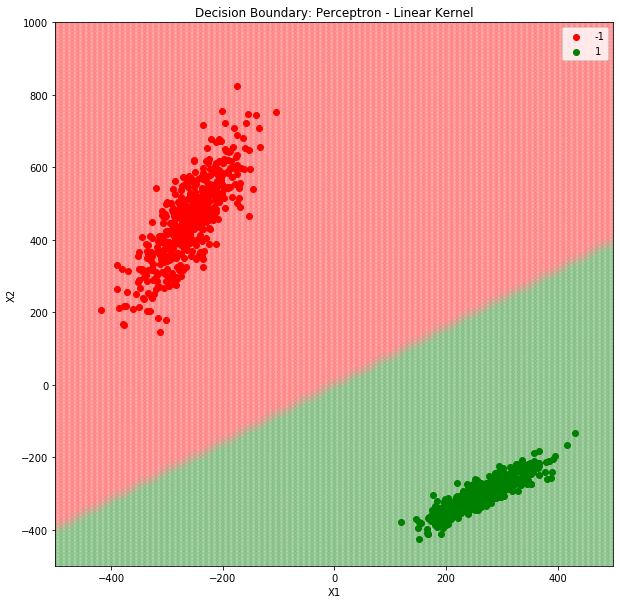

In [ ]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Linear Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel

In [ ]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3

for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X_{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [ ]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [ ]:
np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [ ]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [ ]:
eta = 0.01         
nn = Perceptron(eta)
n_updates_p = nn.train(X_train_a, Y_train)

Converged!!
Epoch: 115, T:115, Error: 593


In [ ]:
n_updates_p

91794

In [ ]:
r = np.max(np.linalg.norm(X_train_a, axis=1))
rho = np.min(np.abs(np.dot(X_train_a, nn.w)))/np.linalg.norm(nn.w)
print('Theoretical bound on the number of updates made by the Perceptron algorithm = ', (r/rho)**2)

Theoretical bound on the number of updates made by the Perceptron algorithm =  303703717874.90326


In [ ]:
Y_train_hat_poly = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_poly = nn.predict(nn.w, X_test_a).astype(int)

In [ ]:
accuracy_poly_train1 = accuracy(Y_train,Y_train_hat_poly)
accuracy_poly_test1 = accuracy(Y_test,Y_test_hat_poly)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test1))

Train Prediction Accuracy: 0.99125
Test Prediction Accuracy: 0.995


In [ ]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in range(len(x_plot.columns)):
    for j in range(i,len(x_plot.columns)):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

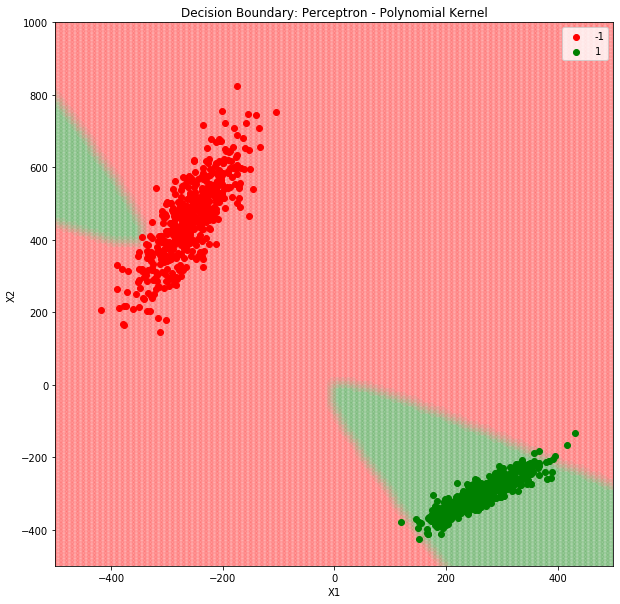

In [ ]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Polynomial Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Tabulating the Results

In [ ]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [ ]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.995 │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Dataset 3

In [ ]:
data = pd.read_csv('Dataset_3_Team_24.csv')
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,0.556383,-0.249476,1
1,-0.237175,0.534400,1
2,0.182019,-0.968976,0
3,-0.663934,0.777924,0
4,-0.855293,-0.272750,0


In [ ]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]]

### Visualising the data

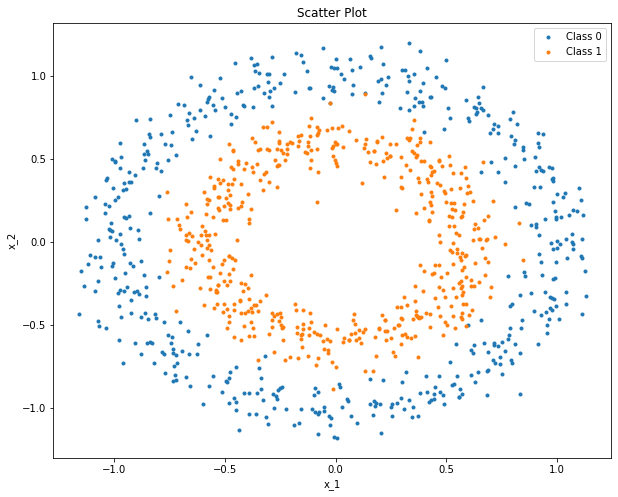

In [ ]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel 

In [ ]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [ ]:
eta = 0.01         
nn = Perceptron(eta)
n_updates = nn.train(X_train_a, Y_train)

Did not converge!


In [ ]:
n_updates

In [ ]:
r = np.max(np.linalg.norm(X_train_a, axis=1))
rho = np.min(np.abs(np.dot(X_train_a, nn.w)))/np.linalg.norm(nn.w)
print('Theoretical bound on the number of updates made by the Perceptron algorithm = ', (r/rho)**2)

Theoretical bound on the number of updates made by the Perceptron algorithm =  109247339.54965755


In [ ]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a)
Y_test_hat_lin = nn.predict(nn.w, X_test_a)

In [ ]:
accuracy_linear_train2 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test2 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test2))

Train Prediction Accuracy: 0.4025
Test Prediction Accuracy: 0.395


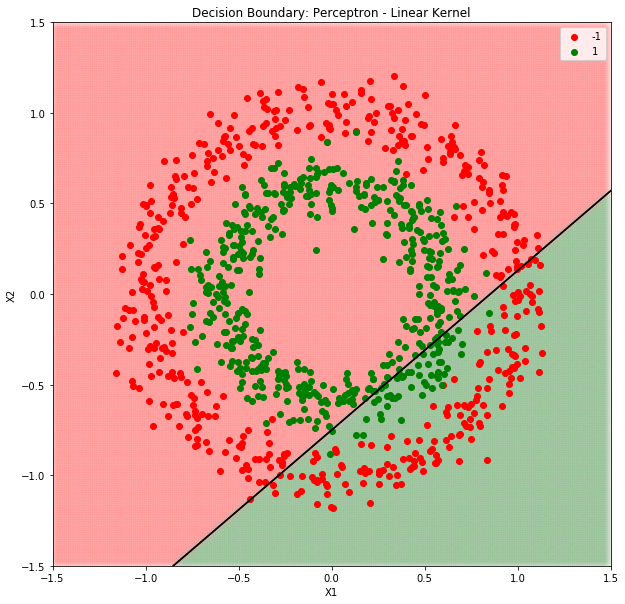

In [ ]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Linear Kernel")
plt.plot(x_l, y_l, '-k')

plt.xlabel('X1')
plt.ylabel('X2')

plt.plot(x_l, y_l, '-k')


plt.show() 

### Polynomial Kernel

In [ ]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3

for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X_{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [ ]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [ ]:
np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [ ]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [ ]:
eta = 0.01         
nn = Perceptron(eta)
n_updates_p = nn.train(X_train_a, Y_train)

Converged!!
Epoch: 21, T:21, Error: 742


In [ ]:
n_updates_p

16743

In [ ]:
r = np.max(np.linalg.norm(X_train_a, axis=1))
rho = np.min(np.abs(np.dot(X_train_a, nn.w)))/np.linalg.norm(nn.w)
print('Theoretical bound on the number of updates made by the Perceptron algorithm = ', (r/rho)**2)

Theoretical bound on the number of updates made by the Perceptron algorithm =  3013441.392861017


In [ ]:
Y_train_hat_poly = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_poly = nn.predict(nn.w, X_test_a).astype(int)

In [ ]:
accuracy_poly_train2 = accuracy(Y_train,Y_train_hat_poly)
accuracy_poly_test2 = accuracy(Y_test,Y_test_hat_poly)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test2))

Train Prediction Accuracy: 0.99125
Test Prediction Accuracy: 0.98


In [ ]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in range(len(x_plot.columns)):
    for j in range(i,len(x_plot.columns)):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

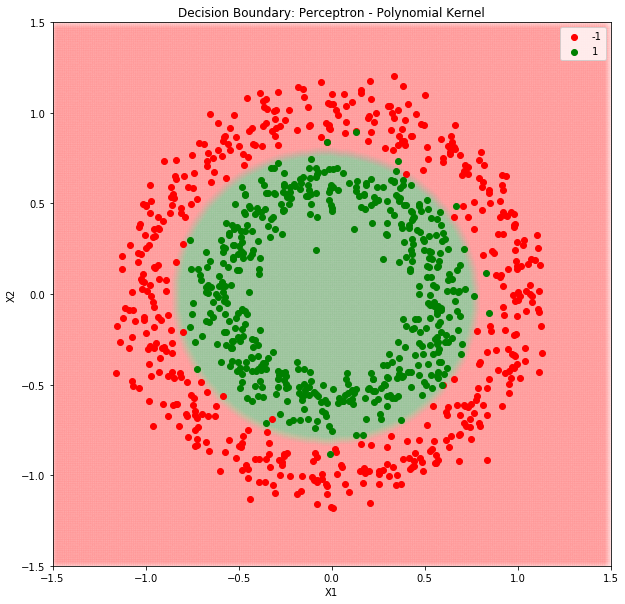

In [ ]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Polynomial Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Tabulating the Results

In [ ]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [ ]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.4025  │           0.395 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.98  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Comparing both the models with Hard Margin SVMs

### Dataset 1

### Linear Kernel

In [ ]:
data = pd.read_csv('Dataset_1_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [ ]:
X = data.drop('Y',axis=1)
y = data['Y']

In [ ]:
# Train test split
np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [ ]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [ ]:
model = SVC(C=1000, kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Getting train and test accuracy
accuracy_svm_train1 = accuracy(y_train, y_train_pred)
accuracy_svm_test1 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


C:\Users\nithy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


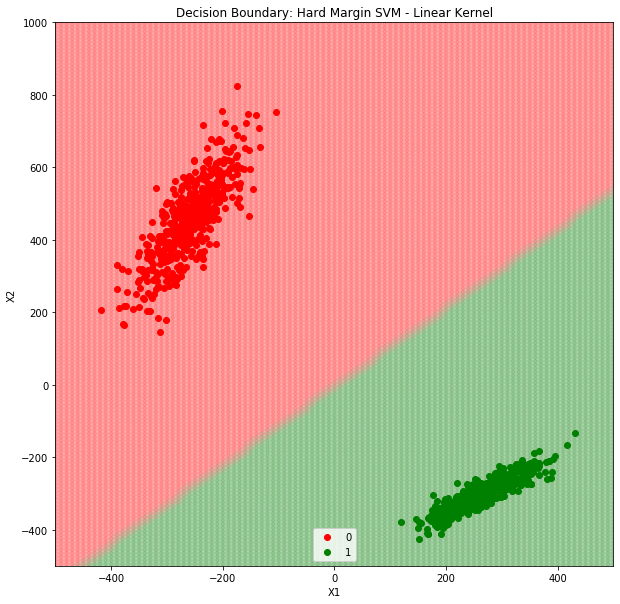

In [ ]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Hard Margin SVM - Linear Kernel")

# plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
# plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel (Degree = 2)

In [ ]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [ ]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\nithy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Getting train and test accuracy
accuracy_svm_train2 = accuracy(y_train, y_train_pred)
accuracy_svm_test2 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test2))

Train Prediction Accuracy: 0.93125
Test Prediction Accuracy: 0.94


C:\Users\nithy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


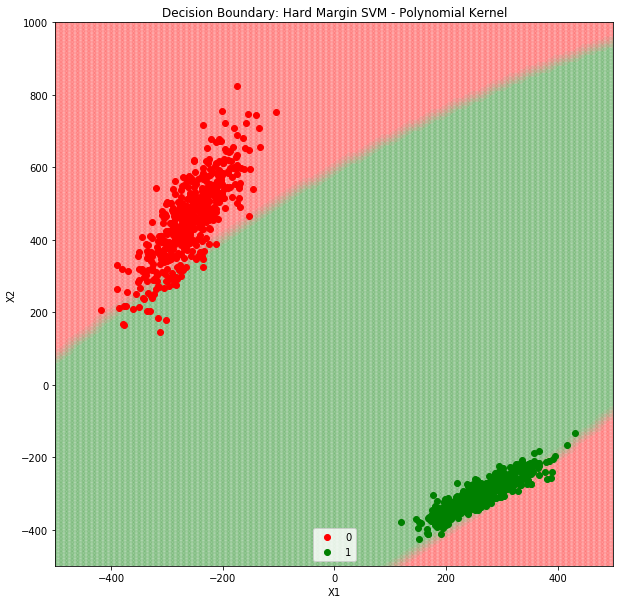

In [ ]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Decision Boundary: Hard Margin SVM - Polynomial Kernel")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Dataset 3

### Linear Kernel

In [ ]:
data = pd.read_csv('Dataset_3_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [ ]:
X = data.drop('Y',axis=1)
y = data['Y']

In [ ]:
# Train test split
np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [ ]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [ ]:
model = SVC(C=1000,kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Getting train and test accuracy
accuracy_svm_train3 = accuracy(y_train, y_train_pred)
accuracy_svm_test3 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train3))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test3))

Train Prediction Accuracy: 0.53
Test Prediction Accuracy: 0.475


C:\Users\nithy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


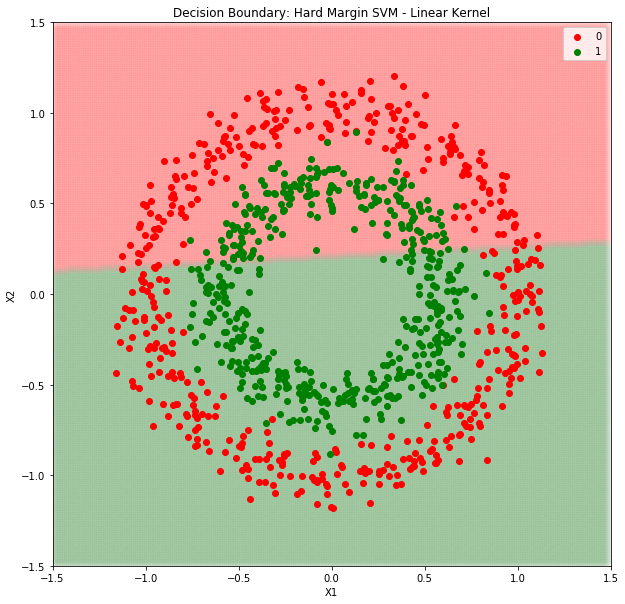

In [ ]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: Hard Margin SVM - Linear Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')


plt.show() 

### Polynomial Kernel (Degree = 2)

In [ ]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [ ]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\nithy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Getting train and test accuracy
accuracy_svm_train4 = accuracy(y_train, y_train_pred)
accuracy_svm_test4 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train4))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test4))

Train Prediction Accuracy: 0.98875
Test Prediction Accuracy: 0.97


C:\Users\nithy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


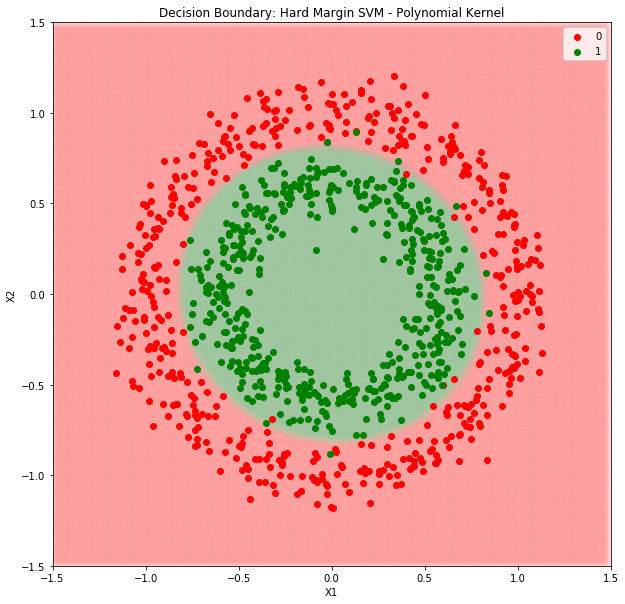

In [ ]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: Hard Margin SVM - Polynomial Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')

plt.show() 

### Table of classification accuracy on the train and test data for both the kernels on boththe above datasets

In [ ]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1],
    ['SVM ', 'Linear', accuracy_svm_train1 ,accuracy_svm_test1],
    ['', 'Polynomial', accuracy_svm_train2 ,accuracy_svm_test2]],
    headers= ['DATASET1', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')    

In [ ]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET1                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.995 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.93125 │           0.94  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

In [ ]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2],
    ['SVM ', 'Linear', accuracy_svm_train3 ,accuracy_svm_test3],
    ['', 'Polynomial', accuracy_svm_train4 ,accuracy_svm_test4]],
    headers= ['DATASET3', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [ ]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET3                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.4025  │           0.395 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.98  │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          0.53    │           0.475 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.98875 │           0.97  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

Dataset 1 is linearly separable, hence a linear kernel is the best. The linear kernel gives 100% accuracy here, since the datapoints are well seperated as well. The polynomial kernel also works here, but due to the shape of the decision boundary, a few points are misclassified. It also leads to a little amount of overfitting

Dataset 3 is not linearly separable, hence clearly the polynomial kernel is better. Linear kernels perform very poorly here since a straight line cannot classify both the classes.

Hard margin SVMs are such that there is a very small margin of classification, hence it tries to make it such that not a single point is misclassified.

Dataset 1 being linearly separable and VERY FAR APART, the hard margin SVM is also able to classify to obtain an accuracy of 100% for both train and test. Again, the fact that both the classes are well separated results in both the models performing easily well (in the case of linear kernels).
In the case of polynomial kernels, the perceptron performs much better since the hard margin SVM takes a very thin margin of separation and hence misclassifies a few points near the boundary.

Dataset 3 is not linearly separable, so the linear kernels perform equally bad in the case of both perceptron and SVM, and there is not much point comparing these since, the classification is altogether incorrect.
In the case of polynomial kernels, both the models were found to work equally well. We find different trends depending on the train test split. On this particular split, perceptron model is found to classify better. Very similar accuracies are obtained since the dataset is very easily separable.